# Bioethanol production in Brazil

### Downloading the data

In [1]:
# Un-comment to download spreadsheets to data folder
#import requests, zipfile, io
#r = requests.get('https://www.gov.br/anp/pt-br/assuntos/producao-e-fornecimento-de-biocombustiveis/etanol/arquivos-etanol/pb-da-etanol.zip')
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall(path='./data/')

### Reading the data

In [2]:
from pathlib import Path
import csv

In [3]:
# File containing production capacity per plant site
path = Path('./data/Etanol_DadosAbertos_CSV_Capacidade.csv')
lines = path.read_text(encoding='utf-8').splitlines()

reader = csv.reader(lines)
header_row = next(reader)

In [4]:
print("Column names:")
for i, name in enumerate(header_row):
    print(f"{i}: {name}")

Column names:
0: ﻿Mês/Ano
1: Razão Social
2: CNPJ
3: Região
4: Estado
5: Município
6: Capacidade Produção Etanol Anidro (m³/d)
7: Capacidade Produção Etanol Hidratado (m³/d)


Note: A CNPJ, or Cadastro Nacional de Pessoa Jurídica, is a unique tax identification number given to entities such as companies, partnerships, foundations and in this case, plant sites. Each plant site has its own unique CNPJ. This means that a company with multiple plants will have multiple CNPJs with a different number for each site.

In [5]:
import pandas as pd

In [6]:
date_format = '%m/%Y'

In [7]:
dates = []
names = []
cnpjs = []
states = []
capacities_anhydrous = []
capacities_hydrous = []


for row in reader:
    date = pd.to_datetime(row[0], format=date_format)
    name = row[1]
    cnpj = int(row[2])
    state = row[4]
    capacity_anhydrous = int(row[6])
    capacity_hydrous = int(row[7])

    dates.append(date)
    names.append(name)
    cnpjs.append(cnpj)
    states.append(state)
    capacities_anhydrous.append(capacity_anhydrous)
    capacities_hydrous.append(capacity_hydrous)

In [8]:
df = pd.DataFrame({'date': dates,
                   'name': names,
                   'cnpj': cnpjs,
                   'state': states,
                   'capacity_hydrous': capacities_hydrous,
                   'capacity_anhydrous': capacities_anhydrous})

In [9]:
df.head()

,date,name,cnpj,state,capacity_hydrous,capacity_anhydrous
0,2024-11-01,CARAMURU ALIMENTOS S/A,80671002668,Mato Grosso,50,0
1,2024-11-01,DESTILARIA DE ÁLCOOL LIBRA LTDA - EM RECUPERAÇ...,297598000122,Mato Grosso,600,600
2,2024-11-01,CENTRAL ENERGETICA VALE DO SAPUCAI LTDA,372496000124,São Paulo,900,517
3,2024-11-01,DENUSA DESTILARIA NOVA UNIAO S/A - EM RECUPERA...,595322000120,Goiás,650,450
4,2024-11-01,SANTA CRUZ ACUCAR E ALCOOL LTDA,738822000255,Bahia,240,200


### Exploring the data

In [10]:
def get_most_recent_record(df,cnpj):
    return df[df['cnpj']==cnpj].to_dict('records')[0]

In [11]:
def get_subset_for_last_records_of_the_year(df,year):

    df_subset = df[(df['date'].dt.year > year-1) & (df['date'].dt.year < year+1)]
    unique_cnpj_list = df_subset['cnpj'].unique().tolist()

    for cnpj in unique_cnpj_list:
        date = get_most_recent_record(df_subset,cnpj)['date']
        df_subset = df_subset[~((df_subset['date']!=date) & (df_subset['cnpj']==cnpj))]

    return df_subset

In [12]:
year = 2024

In [13]:
df_2024 = get_subset_for_last_records_of_the_year(df,year)

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
Nvals = 10
bar_labels = df_2024.sort_values(by=['capacity_anhydrous'], ascending=False)['name'].head(Nvals).tolist()

labels = []
for i, name in enumerate(bar_labels,start=1):
    labels.append(f"{i}: {name}")


In [23]:
bar_colors = ['tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:olive', 'tab:purple', 'tab:orange', 'tab:green']
# https://matplotlib.org/stable/gallery/color/named_colors.html
# create a function that returns colornames

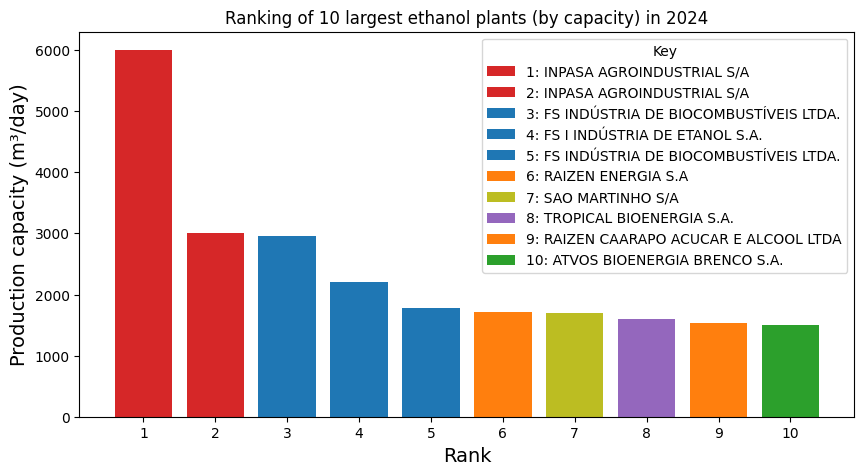

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
xvals = np.arange(1,Nvals+1,1)
yvals = df_2024.sort_values(by=['capacity_anhydrous'], ascending=False)['capacity_anhydrous'].head(Nvals)
ax.bar(xvals , yvals, label = labels, color = bar_colors)
ax.legend(title='Key')
ax.set_title('Ranking of 10 largest ethanol plants (by capacity) in 2024')
ax.set_xticks(xvals)
ax.set_xlabel('Rank', fontsize=14)
ax.set_ylabel('Production capacity (m³/day)', fontsize=14)
plt.show()